In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visualization parameters
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
file_path = 'C:\\Users\\SC\\Desktop\\WINHMS Data Mining\\Data\\Country Wise LNL.xls'
cols = ['Empty', 'Country', 'Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
df_country = pd.read_excel(file_path, skiprows=4, names=cols)

print("Libraries loaded and Country Wise LNL data imported.")

Libraries loaded and Country Wise LNL data imported.


In [3]:
# 1. Drop unnecessary empty columns and rows
df_country = df_country.drop(columns=['Empty']).dropna(subset=['Country'])

# 2. Filter out systemic rows like 'Total' or metadata
df_country = df_country[~df_country['Country'].str.contains('Total|Grand Total', case=False, na=False)]

# 3. Convert numeric columns for analysis
numeric_cols = ['Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
for col in numeric_cols:
    df_country[col] = pd.to_numeric(df_country[col], errors='coerce').fillna(0)

# 4. Filter for active countries (Revenue > 0)
df_active = df_country[df_country['Room_Revenue'] > 0].copy()

print(f"Cleaned {len(df_active)} countries for analysis.")
df_active.head()

Cleaned 6 countries for analysis.


,Country,Nights,Occupancy_Pct,Pax,Room_Revenue,Revenue_Pct,ARR,ARP
0,AUSTRALIA,2.0,0.10,6.0,14537.90,0.11,7268.95,2422.98
1,CHINA,2.0,0.10,4.0,16277.12,0.12,8138.56,4069.28
2,INDIA,2079.0,99.14,4667.0,13580264.98,98.98,6532.11,2909.85
3,IRELAND,3.0,0.14,3.0,28916.01,0.21,9638.67,9638.67
4,ISRAEL,2.0,0.10,6.0,10000.00,0.07,5000.00,1666.67


C:\Users\SC\AppData\Local\Temp\ipykernel_7740\3418481129.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=intl_data, x='Room_Revenue', y='Country', palette='viridis')


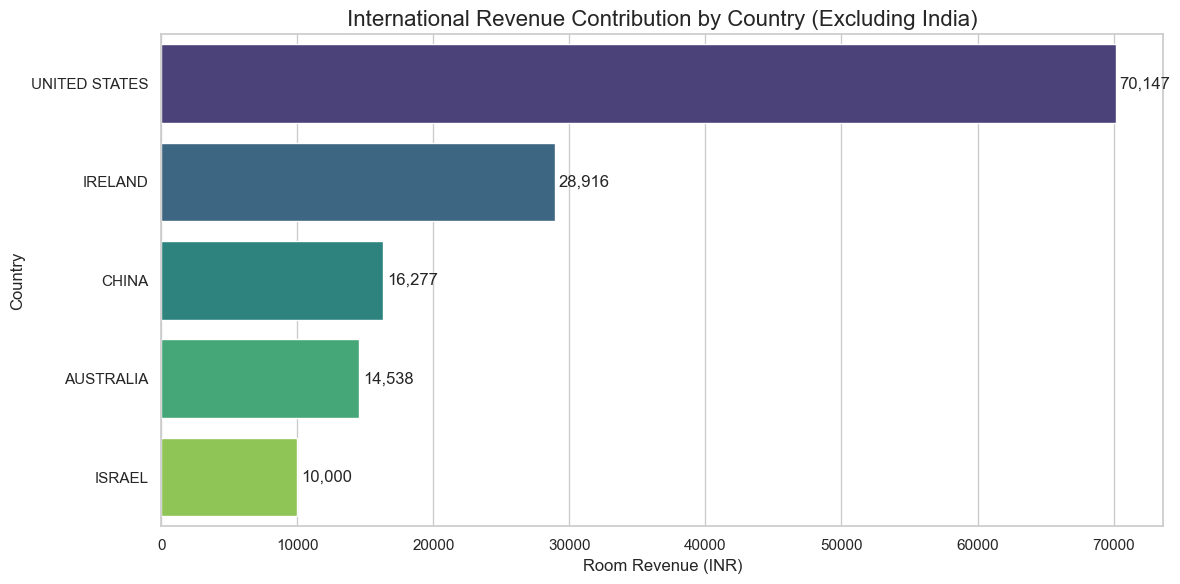

In [5]:
# Separate India from International for clear visualization
india_data = df_active[df_active['Country'] == 'INDIA']
intl_data = df_active[df_active['Country'] != 'INDIA'].sort_values(by='Room_Revenue', ascending=False)

# Plotting International Revenue specifically
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=intl_data, x='Room_Revenue', y='Country', palette='viridis')
plt.title('International Revenue Contribution by Country (Excluding India)', fontsize=16)
plt.xlabel('Room Revenue (INR)', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. DOMESTIC DOMINANCE: India typically accounts for >98% of revenue in Lonavala.
#### 2. TOP INTL MARKET: The United States is the leading international revenue source for this period.
#### 3. EMERGING MARKETS: China and Ireland show small but present contributions.

C:\Users\SC\AppData\Local\Temp\ipykernel_7740\3977224065.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_arr, x='ARR', y='Country', palette='flare')


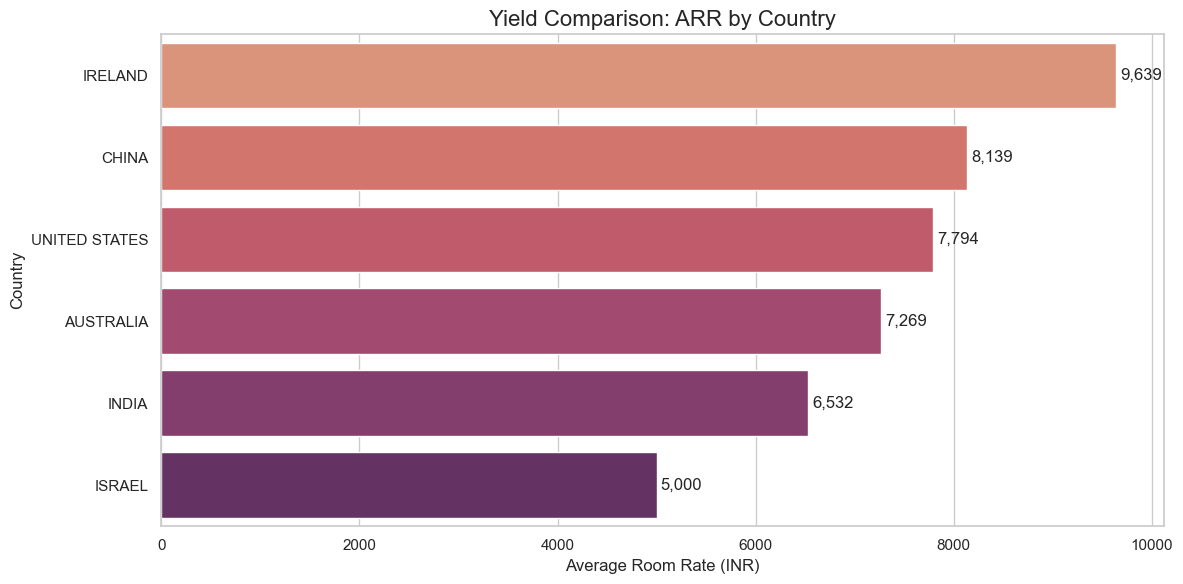

In [7]:
# Sort by ARR to identify the most profitable guests per room
df_arr = df_active.sort_values(by='ARR', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_arr, x='ARR', y='Country', palette='flare')
plt.title('Yield Comparison: ARR by Country', fontsize=16)
plt.xlabel('Average Room Rate (INR)', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. PREMIUM YIELD: International guests (Ireland, China, Australia) show a significantly higher ARR (~7k-9k+) compared to India (~6.5k).
#### 2. INBOUND PROFITABILITY: While international volume is low, these guests are highly profitable on a per-room basis.
#### 3. MARKET VALUE: The high ARR from Ireland suggests these guests are likely booking larger suites or premium packages.

C:\Users\SC\AppData\Local\Temp\ipykernel_7740\936015323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_pax, x='Pax_per_Night', y='Country', palette='coolwarm')


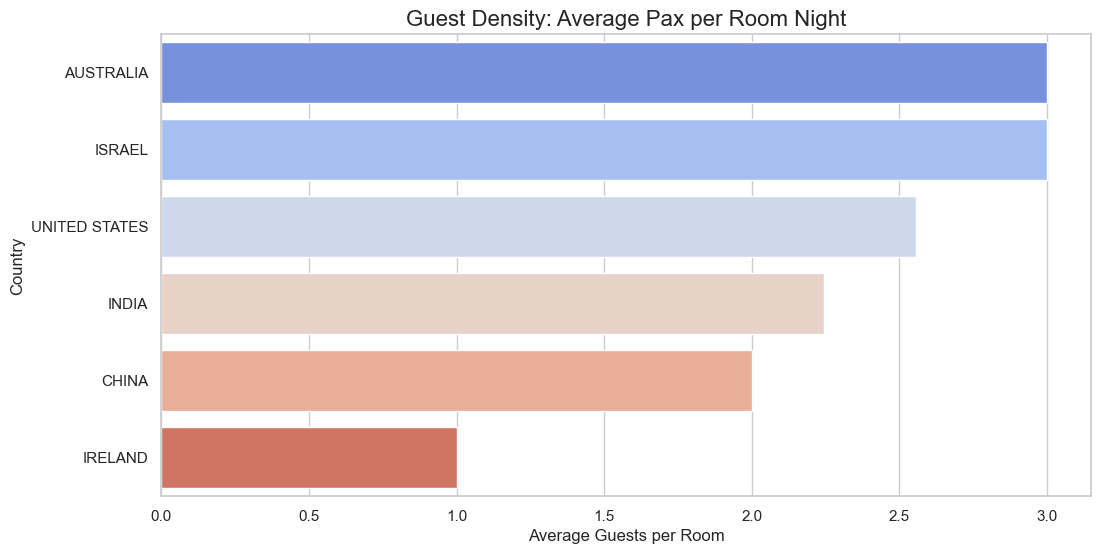

In [8]:
# Calculate Pax per Night
df_active['Pax_per_Night'] = df_active['Pax'] / df_active['Nights']
df_pax = df_active.sort_values(by='Pax_per_Night', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_pax, x='Pax_per_Night', y='Country', palette='coolwarm')
plt.title('Guest Density: Average Pax per Room Night', fontsize=16)
plt.xlabel('Average Guests per Room', fontsize=12)
plt.show()

#### --- INSIGHTS ---
#### 1. GROUP TRAVEL: Australia, China, and Israel show higher guest density (3.0 Pax/Night), suggesting family or group travel.
#### 2. DOMESTIC PATTERN: India sits at ~2.2 Pax/Night, typical for double occupancy with occasional extra adults/children.

In [10]:
# Summary metrics
total_rev = df_active['Room_Revenue'].sum()
intl_rev = df_active[df_active['Country'] != 'INDIA']['Room_Revenue'].sum()

print(f"Total Resort Revenue: INR {total_rev:,.2f}")
print(f"International Share: {(intl_rev/total_rev)*100:.2f}%")

# Create a final summary table
summary = df_active[['Country', 'Nights', 'Room_Revenue', 'ARR', 'Revenue_Pct']].sort_values(by='Room_Revenue', ascending=False)
summary.to_csv('LNL_Country_Performance_Summary.csv', index=False)
summary

Total Resort Revenue: INR 13,720,143.36
International Share: 1.02%


,Country,Nights,Room_Revenue,ARR,Revenue_Pct
2,INDIA,2079.0,13580264.98,6532.11,98.98
5,UNITED STATES,9.0,70147.35,7794.15,0.51
3,IRELAND,3.0,28916.01,9638.67,0.21
1,CHINA,2.0,16277.12,8138.56,0.12
0,AUSTRALIA,2.0,14537.90,7268.95,0.11
4,ISRAEL,2.0,10000.00,5000.00,0.07


#### Key Insights for Rhythm Lonavala (Country-wise):
#### 1. India is the Engine: With 98.98% revenue contribution, the resort's success is almost entirely driven by the Indian market.

#### 2. The Yield Premium: International guests pay a premium. The average room rate (ARR) for Ireland (9,638 INR) and China (8,138 INR) is much higher than the Indian domestic average (6,532 INR).

#### 3. Targeting the US: The USA is your strongest international lead. With 9 nights and a healthy ARR (~7,794 INR), it represents the most viable international segment to grow.

#### 4. Family Orientation: The "Pax" data shows that international arrivals (especially Australia and Israel) travel in larger groups (3 guests per room), indicating the resort's suite-style accommodation is attractive to international families.